<a href="https://colab.research.google.com/github/karthik-sriram-5503/website-traffic-analysis/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WEBSITE TRAFFIC ANALYSIS

In [ ]:
#importing the dependency
import pandas as pd


In [ ]:
#importing the dataset
path="/content/daily-website-visitors.csv"
whole_dataset = pd.read_csv(path,
                            index_col='Date',
                            thousands=',')

In [ ]:
whole_dataset

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
9/14/2014,1,Sunday,1,2146,1582,1430,152
9/15/2014,2,Monday,2,3621,2528,2297,231
9/16/2014,3,Tuesday,3,3698,2630,2352,278
9/17/2014,4,Wednesday,4,3667,2614,2327,287
9/18/2014,5,Thursday,5,3316,2366,2130,236
...,...,...,...,...,...,...,...
8/15/2020,2163,Saturday,7,2221,1696,1373,323
8/16/2020,2164,Sunday,1,2724,2037,1686,351
8/17/2020,2165,Monday,2,3456,2638,2181,457


converting date to proper format

In [ ]:
whole_dataset.index = pd.to_datetime(whole_dataset.index)
whole_dataset

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
2014-09-14,1,Sunday,1,2146,1582,1430,152
2014-09-15,2,Monday,2,3621,2528,2297,231
2014-09-16,3,Tuesday,3,3698,2630,2352,278
2014-09-17,4,Wednesday,4,3667,2614,2327,287
2014-09-18,5,Thursday,5,3316,2366,2130,236
...,...,...,...,...,...,...,...
2020-08-15,2163,Saturday,7,2221,1696,1373,323
2020-08-16,2164,Sunday,1,2724,2037,1686,351
2020-08-17,2165,Monday,2,3456,2638,2181,457


In [ ]:
whole_dataset.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2167 entries, 2014-09-14 to 2020-08-19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Page.Loads         2167 non-null   int64 
 4   Unique.Visits      2167 non-null   int64 
 5   First.Time.Visits  2167 non-null   int64 
 6   Returning.Visits   2167 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 135.4+ KB


In [ ]:
whole_dataset.describe()

,Row,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,1084.000000,3.997231,4116.989386,2943.646516,2431.824181,511.822335
std,625.703338,2.000229,1350.977843,977.886472,828.704688,168.736370
min,1.000000,1.000000,1002.000000,667.000000,522.000000,133.000000
25%,542.500000,2.000000,3114.500000,2226.000000,1830.000000,388.500000
50%,1084.000000,4.000000,4106.000000,2914.000000,2400.000000,509.000000
75%,1625.500000,6.000000,5020.500000,3667.500000,3038.000000,626.500000
max,2167.000000,7.000000,7984.000000,5541.000000,4616.000000,1036.000000


checking for NaN values

In [ ]:
whole_dataset.isna().sum()


Row                  0
Day                  0
Day.Of.Week          0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64

checking for duplicate values

In [ ]:
whole_dataset.duplicated().sum()


0

In [ ]:
import matplotlib.pyplot as plt


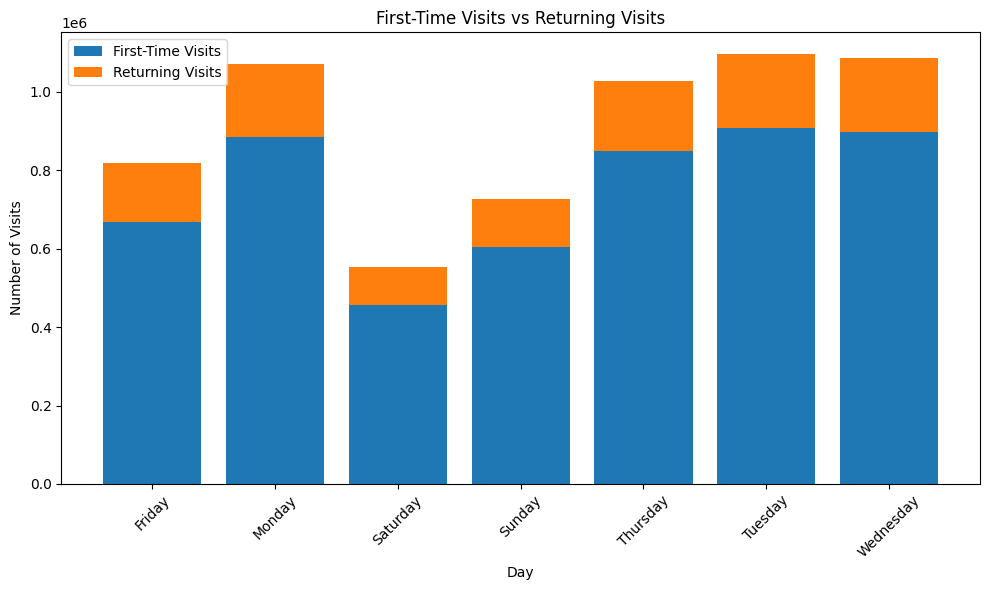

In [ ]:
groupdata = whole_dataset.groupby('Day')[['First.Time.Visits', 'Returning.Visits']].sum().reset_index()

# Plotting the stacked bar chart for first-time visits and returning visits
plt.figure(figsize=(10, 6))
plt.bar(groupdata['Day'], groupdata['First.Time.Visits'], label='First-Time Visits')
plt.bar(groupdata['Day'], groupdata['Returning.Visits'], bottom=groupdata['First.Time.Visits'], label='Returning Visits')
plt.xlabel('Day')
plt.ylabel('Number of Visits')
plt.title('First-Time Visits vs Returning Visits')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()  # Show legend to distinguish between first-time and returning visits
plt.tight_layout()
plt.show()